In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

dir_ = '/content/drive/MyDrive/ift6759_trees' # Anni
# dir_ = '/content/drive/MyDrive/Mila/ift6759_trees' # Xavier

Mounted at /content/drive


In [ ]:
!pip install rasterio -q
!pip install geopandas -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 37.3 MB/s eta 0:00:00


# Create GeoDataFrames for train, val, test (DO NOT RE-EXECUTE!)

In [ ]:
import geopandas

mlbs_shapefile_path = os.path.join(dir_,'data/raw/ITC/train_MLBS.shp')
osbs_shapefile_path = os.path.join(dir_,'data/raw/ITC/train_OSBS.shp')

mlbs = geopandas.read_file(mlbs_shapefile_path)
osbs = geopandas.read_file(osbs_shapefile_path)

In [ ]:
import pandas as pd

all = pd.concat([mlbs, osbs], ignore_index=True, axis=0)
all

,id,indvdID,geometry
0,57,MLBS01681,"POLYGON ((542071.187 4134996.073, 542071.187 4..."
1,45,MLBS01679,"POLYGON ((542055.000 4134998.793, 542058.995 4..."
2,49,MLBS01674,"POLYGON ((542060.170 4134993.382, 542060.170 4..."
3,63,MLBS01678,"POLYGON ((542057.702 4134991.627, 542057.702 4..."
4,50,MLBS01675,"POLYGON ((542061.068 4134991.193, 542061.068 4..."
...,...,...,...
1175,1037,OSBS00849,"POLYGON ((404886.400 3284465.000, 404886.400 3..."
1176,1034,OSBS00910,"POLYGON ((404906.000 3284467.630, 404899.070 3..."
1177,1032,OSBS07977,"POLYGON ((404891.840 3284470.990, 404891.840 3..."
1178,1035,OSBS00898,"POLYGON ((404891.740 3284466.870, 404891.740 3..."


In [ ]:
df = pd.read_csv(os.path.join(dir_,'data/raw/Field/itc_rsFile.csv'))
df

,id,indvdID,rsFile
0,57,MLBS01681,MLBS_1.tif
1,45,MLBS01679,MLBS_1.tif
2,49,MLBS01674,MLBS_1.tif
3,63,MLBS01678,MLBS_1.tif
4,50,MLBS01675,MLBS_1.tif
...,...,...,...
1175,1037,OSBS00849,OSBS_9.tif
1176,1034,OSBS00910,OSBS_9.tif
1177,1032,OSBS07977,OSBS_9.tif
1178,1035,OSBS00898,OSBS_9.tif


In [ ]:
all['rsFile'] = df['rsFile']
all

,id,indvdID,geometry,rsFile
0,57,MLBS01681,"POLYGON ((542071.187 4134996.073, 542071.187 4...",MLBS_1.tif
1,45,MLBS01679,"POLYGON ((542055.000 4134998.793, 542058.995 4...",MLBS_1.tif
2,49,MLBS01674,"POLYGON ((542060.170 4134993.382, 542060.170 4...",MLBS_1.tif
3,63,MLBS01678,"POLYGON ((542057.702 4134991.627, 542057.702 4...",MLBS_1.tif
4,50,MLBS01675,"POLYGON ((542061.068 4134991.193, 542061.068 4...",MLBS_1.tif
...,...,...,...,...
1175,1037,OSBS00849,"POLYGON ((404886.400 3284465.000, 404886.400 3...",OSBS_9.tif
1176,1034,OSBS00910,"POLYGON ((404906.000 3284467.630, 404899.070 3...",OSBS_9.tif
1177,1032,OSBS07977,"POLYGON ((404891.840 3284470.990, 404891.840 3...",OSBS_9.tif
1178,1035,OSBS00898,"POLYGON ((404891.740 3284466.870, 404891.740 3...",OSBS_9.tif


In [ ]:
all.to_file(os.path.join(dir_,'data/raw/ITC/all.shp'))

In [ ]:
import os

train_files = os.listdir(os.path.join(dir_,'data/interim/RemoteSensing/train/RGB'))
val_files = os.listdir(os.path.join(dir_,'data/interim/RemoteSensing/val/RGB'))
test_files = os.listdir(os.path.join(dir_,'data/interim/RemoteSensing/test/RGB'))

In [ ]:
df_train = all.loc[all['rsFile'].isin(train_files)]
df_train.to_file(os.path.join(dir_,'data/interim/ITC/train.shp'), index=False)
df_train

,id,indvdID,geometry,rsFile
0,57,MLBS01681,"POLYGON ((542071.187 4134996.073, 542071.187 4...",MLBS_1.tif
1,45,MLBS01679,"POLYGON ((542055.000 4134998.793, 542058.995 4...",MLBS_1.tif
2,49,MLBS01674,"POLYGON ((542060.170 4134993.382, 542060.170 4...",MLBS_1.tif
3,63,MLBS01678,"POLYGON ((542057.702 4134991.627, 542057.702 4...",MLBS_1.tif
4,50,MLBS01675,"POLYGON ((542061.068 4134991.193, 542061.068 4...",MLBS_1.tif
...,...,...,...,...
1175,1037,OSBS00849,"POLYGON ((404886.400 3284465.000, 404886.400 3...",OSBS_9.tif
1176,1034,OSBS00910,"POLYGON ((404906.000 3284467.630, 404899.070 3...",OSBS_9.tif
1177,1032,OSBS07977,"POLYGON ((404891.840 3284470.990, 404891.840 3...",OSBS_9.tif
1178,1035,OSBS00898,"POLYGON ((404891.740 3284466.870, 404891.740 3...",OSBS_9.tif


In [ ]:
df_val = all.loc[all['rsFile'].isin(val_files)]
df_val.to_file(os.path.join(dir_,'data/interim/ITC/val.shp'), index=False)
df_val

,id,indvdID,geometry,rsFile
78,186,MLBS01793,"POLYGON ((544326.549 4142344.561, 544326.549 4...",MLBS_14.tif
79,690,MLBS01798,"POLYGON ((544322.797 4142348.244, 544322.797 4...",MLBS_14.tif
80,187,MLBS01789,"POLYGON ((544323.731 4142338.383, 544323.731 4...",MLBS_14.tif
81,188,MLBS01781,"POLYGON ((544317.519 4142338.544, 544317.519 4...",MLBS_14.tif
82,189,MLBS01785,"POLYGON ((544321.472 4142338.383, 544321.472 4...",MLBS_14.tif
...,...,...,...,...
970,1497,OSBS00011,"POLYGON ((406969.870 3283964.000, 406969.870 3...",OSBS_27.tif
971,1496,OSBS01298,"POLYGON ((406969.510 3283959.430, 406969.510 3...",OSBS_27.tif
972,1498,OSBS01268,"POLYGON ((406965.340 3283960.940, 406965.340 3...",OSBS_27.tif
1077,1303,OSBS01121,"POLYGON ((404685.570 3288445.420, 404685.570 3...",OSBS_16.tif


In [ ]:
df_test = all.loc[all['rsFile'].isin(test_files)]
df_test.to_file(os.path.join(dir_,'data/interim/ITC/test.shp'), index=False)
df_test

,id,indvdID,geometry,rsFile
191,273,MLBS02427,"POLYGON ((538213.057 4140953.092, 538213.057 4...",MLBS_20.tif
192,275,MLBS02421,"POLYGON ((538206.014 4140954.556, 538206.014 4...",MLBS_20.tif
193,274,MLBS02423,"POLYGON ((538211.200 4140953.937, 538211.200 4...",MLBS_20.tif
194,272,MLBS02419,"POLYGON ((538210.426 4140958.193, 538210.426 4...",MLBS_20.tif
195,280,MLBS02417,"POLYGON ((538213.516 4140953.592, 538213.516 4...",MLBS_20.tif
...,...,...,...,...
1050,1408,OSBS00006,"POLYGON ((408352.000 3285353.490, 408346.700 3...",OSBS_32.tif
1051,1403,OSBS00005,"POLYGON ((408352.000 3285366.050, 408351.550 3...",OSBS_32.tif
1052,1399,OSBS00004,"POLYGON ((408344.920 3285368.560, 408344.920 3...",OSBS_32.tif
1078,1303,OSBS01121,"POLYGON ((404685.570 3288445.420, 404685.570 3...",OSBS_35.tif


# Visualize

Hyper-Spectral

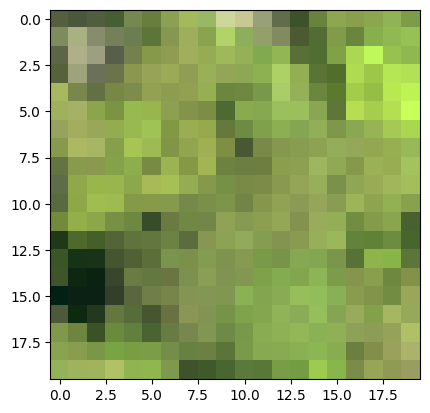

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
# from https://github.com/GatorSense/hsi_toolkit_py/tree/3a03c58bbeaf7b323fa345a22531fa00c56e68b6/hsi_toolkit/util
def get_hsi_bands(hsi_img, wavelengths, wavelengths_to_get):
	"""
	Return hsi stack with bands that are closest to desired wavelengths
	inputs:
		hsi_img - n_row x n_col x n_band hyperspectral image
		wavelengths - 1 x n_band vector listing wavelength values for hsi_img
		wavengths_to_get - 1 x n_band_new vector listing desired wavelengths
	outputs:
		hsi_out - n_row x n_col x n_band_new  image
	5/5/2018 - Alina Zare
	10/5/2018 - Yutai Zhou
	"""
	waves = []
	for i in range(len(wavelengths_to_get)):
		min_index = np.argmin(np.abs(wavelengths - wavelengths_to_get[i]))
		waves.append(min_index)
	waves=np.array(waves)
	hsi_out = hsi_img[:,:,[int(m) for m in waves]];
	return hsi_out
def get_RGB(hsi_img, wavelengths):
    """
    Creates an RGB image from a hyperspectral image
    inputs:
      hsi_img - n_row x n_col x n_band hyperspectral image
      wavelengths - 1 x n_band vector listing wavelength values for hsi_img in nm
    outputs:
      RGB_img - n_row x n_col x 3 RGB image
    5/5/2018 - Alina Zare
    10/5/2018 - Yutai Zhou
    """
    n_row, n_col, n_band = hsi_img.shape
    
    red_wavelengths = list(range(619,659))
    green_wavelengths = list(range(549,570))
    blue_wavelengths = list(range(449,495))

    RGB_img = np.zeros((n_row, n_col, 3))
    a = get_hsi_bands(hsi_img, wavelengths, red_wavelengths)
    
    RGB_img[:,:,0] = np.mean(get_hsi_bands(hsi_img, wavelengths, red_wavelengths), axis=2);
    RGB_img[:,:,1] = np.mean(get_hsi_bands(hsi_img, wavelengths, green_wavelengths), axis=2);
    RGB_img[:,:,2] = np.mean(get_hsi_bands(hsi_img, wavelengths, blue_wavelengths), axis=2);

    RGB_img = ((RGB_img - np.min(RGB_img.flatten())) / (np.max(RGB_img.flatten()) - np.min(RGB_img.flatten()))) ** (1/1.5)
    return RGB_img


def HSI_2_RGB(img_path,nb_bands = 369,min_band=380,max_band=2510):
    ds = gdal.Open(img_path)
    a = np.array(ds.GetRasterBand(1).ReadAsArray())
    for i in range(2,nb_bands+1):
      a = np.dstack((a, np.array(ds.GetRasterBand(i).ReadAsArray())))
    return get_RGB(a,np.linspace(min_band ,max_band,nb_bands))
    
ex = os.path.join(dir_,'data/interim/RemoteSensing/train/HSI/MLBS_1.tif')
plt.imshow(HSI_2_RGB(ex))

In [ ]:
from glob import glob
import os

base_dir = os.path.join(dir_,'data/interim/RemoteSensing')

train_list = sorted(glob(os.path.join(base_dir, 'train', 'RGB', '*.tif')))
val_list = sorted(glob(os.path.join(base_dir, 'val', 'RGB', '*.tif')))
test_list = sorted(glob(os.path.join(base_dir, 'test', 'RGB', '*.tif')))
len(train_list), len(val_list), len(test_list)

(66, 9, 9)

In [ ]:
train_shp = os.path.join(dir_,'data/interim/ITC/train.shp')
val_shp = os.path.join(dir_,'data/interim/ITC/val.shp')
test_shp = os.path.join(dir_,'data/interim/ITC/test.shp')

interactive(children=(Dropdown(description='Set', options=('train', 'val', 'test'), value='train'), Dropdown(d…

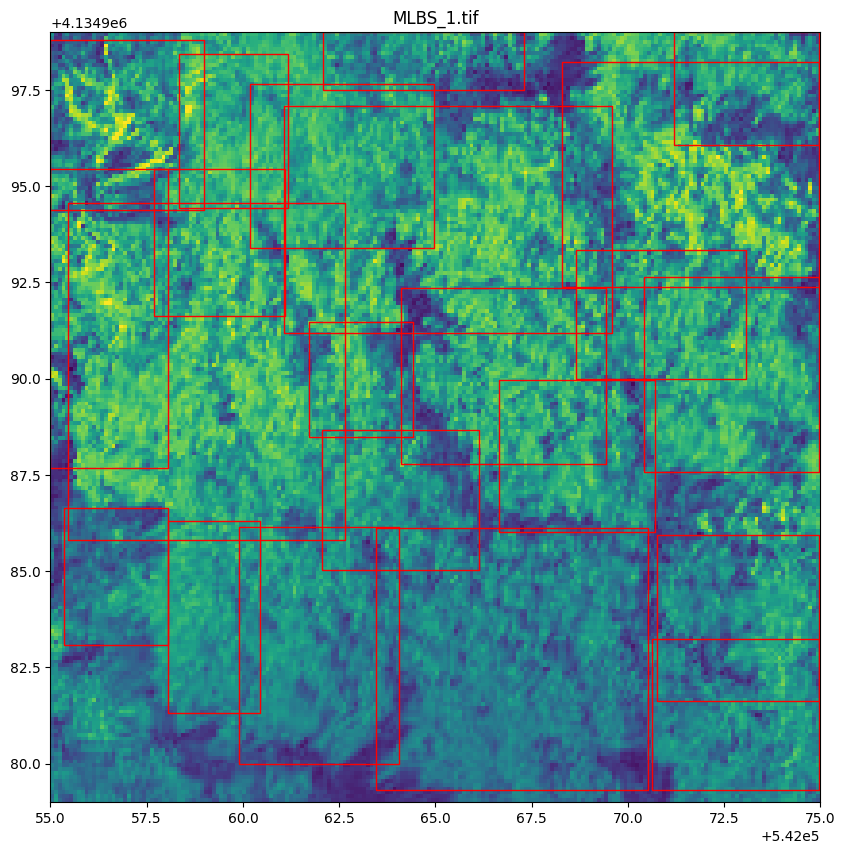

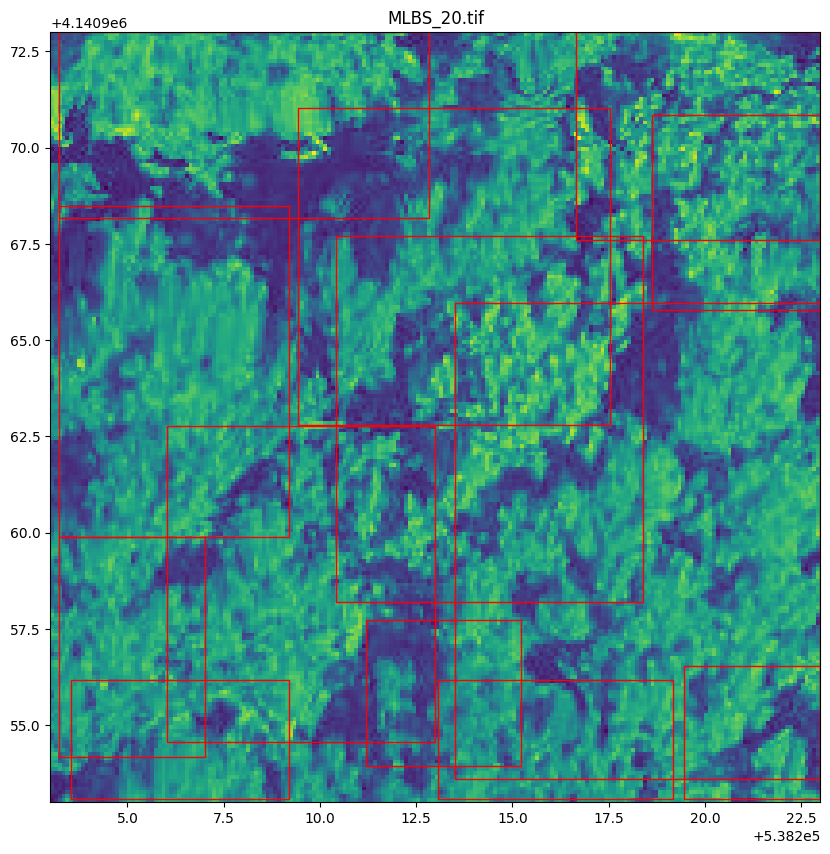

In [ ]:
import geopandas
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot
import ipywidgets as widgets
from ipywidgets import interact
from glob import glob
import os


@ interact(subset=widgets.Dropdown(options=['train', 'val', 'test'], value='train', description='Set'),
           datatype=widgets.Dropdown(options=['RGB', 'HYP'], value='RGB', description='Data type'))
def choose_subset(subset, datatype = 'RGB'):
  """
  Display rbg image with its bounding boxes
  """

  base_dir = os.path.join(dir_,'data/interim/RemoteSensing')

  subset_list = sorted(glob(os.path.join(base_dir, subset, datatype, '*.tif'))) # list of subset files' path
  subset_shp = os.path.join(dir_,f'data/interim/ITC/{subset}.shp') # subset shapefile path

  @ interact(idx=widgets.IntSlider(min=0, max=len(subset_list)-1, step=1, value=0, description='Case #:'))
  def show_rbg_with_bboxes(idx):
    
    img_path = subset_list[idx] 
    img_name = os.path.basename(img_path) # get filename

    img = rasterio.open(img_path) 
   
    
    bboxes = geopandas.read_file(subset_shp) 
    bboxes_img = bboxes[bboxes.rsFile == img_name] # get image bounding boxes 
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(img_name)
    rasterio.plot.show(img, ax=ax)
    bboxes_img.plot(ax=ax, facecolor='none', edgecolor='red')
    

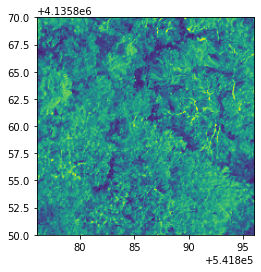

<Axes: >

In [ ]:
import rasterio
import matplotlib.pyplot as pyplot
import numpy as np

dataset = rasterio.open('/content/drive/MyDrive/Mila/ift6759_trees/data/interim/RemoteSensing/test/RGB/MLBS_9.tif')
image2 = dataset.read()
# color_array = np.asarray([dataset.colormap(1)[i] for i in range(256)], dtype=np.uint8)
# image3 = color_array[image2]
rasterio.plot.show(dataset)

# Convert geographic coordinate to pixel and create new dfs (DO NOT RE-EXECUTE!)

In [ ]:
!pip install GDAL -q

In [ ]:
from osgeo import gdal
import pandas as pd
 
# https://gis.stackexchange.com/questions/221292/retrieve-pixel-value-with-geographic-coordinate-as-input-with-gdal

def convert_geo_to_pixel(subset, filename, minx, miny, maxx, maxy):
  base_dir = os.path.join(dir_,'data/interim/RemoteSensing')
  file_path = os.path.join(base_dir, subset, 'RGB', filename) #path to raster
  dataset = gdal.Open(file_path)
  band = dataset.GetRasterBand(1)
  # print(band)

  cols = dataset.RasterXSize
  rows = dataset.RasterYSize
  # print(cols, rows)

  transform = dataset.GetGeoTransform()

  xOrigin = transform[0]
  yOrigin = transform[3]
  pixelWidth = transform[1]
  pixelHeight = -transform[5]
  # print(xOrigin, yOrigin, pixelWidth, pixelHeight)

  data = band.ReadAsArray(0, 0, cols, rows)
  # print(data.shape)

  minx_pixel = int((minx - xOrigin) / pixelWidth)
  maxy_pixel = int((yOrigin - miny ) / pixelHeight)
  maxx_pixel = int((maxx - xOrigin) / pixelWidth)
  miny_pixel = int((yOrigin - maxy ) / pixelHeight)

  # print(col) # x
  # print('===')
  # print(row) # y 
  # print('===')
  return minx_pixel, miny_pixel, maxx_pixel, maxy_pixel


In [ ]:
df

,minx,miny,maxx,maxy,id,indvdID,rsFile,minx_pixel,miny_pixel,maxx_pixel,maxy_pixel,taxonID
0,542071.186834,4.134996e+06,542074.969940,4.134999e+06,57,MLBS01681,MLBS_1.tif,161,0,199,29,AMLA
1,542055.000000,4.134994e+06,542058.995294,4.134999e+06,45,MLBS01679,MLBS_1.tif,0,2,39,46,QURU
2,542060.169555,4.134993e+06,542064.969398,4.134998e+06,49,MLBS01674,MLBS_1.tif,51,13,99,56,QURU
3,542057.701672,4.134992e+06,542061.088781,4.134995e+06,63,MLBS01678,MLBS_1.tif,27,35,60,73,QURU
4,542061.068128,4.134991e+06,542069.577248,4.134997e+06,50,MLBS01675,MLBS_1.tif,60,19,145,78,ACPE
...,...,...,...,...,...,...,...,...,...,...,...,...
926,404886.400000,3.284465e+06,404893.920000,3.284466e+06,1037,OSBS00849,OSBS_9.tif,4,188,79,200,PIPA2
927,404899.070000,3.284468e+06,404906.000000,3.284476e+06,1034,OSBS00910,OSBS_9.tif,130,93,200,173,PIPA2
928,404891.840000,3.284471e+06,404899.850000,3.284478e+06,1032,OSBS07977,OSBS_9.tif,58,73,138,140,PIPA2
929,404891.740000,3.284467e+06,404899.050000,3.284472e+06,1035,OSBS00898,OSBS_9.tif,57,129,130,181,PIPA2


In [ ]:
subset = 'test'
df = pd.read_csv(os.path.join(dir_,f'data/interim/ITC/{subset}_pixel_v2.csv'))
tmp = df.apply(lambda row: convert_geo_to_pixel(subset, row.rsFile, row.minx, row.miny, row.maxx, row.maxy), axis=1)
tmp

0      (100, 168, 161, 199)
1        (30, 102, 99, 184)
2       (81, 152, 122, 190)
3        (74, 52, 153, 148)
4       (105, 70, 200, 194)
               ...         
129    (147, 147, 200, 195)
130      (195, 57, 200, 69)
131       (129, 3, 192, 44)
132       (55, 21, 117, 95)
133       (0, 50, 122, 198)
Length: 134, dtype: object

In [ ]:
df['minx_pixel'] = tmp.apply(lambda row: row[0])
df['miny_pixel'] = tmp.apply(lambda row: row[1])
df['maxx_pixel'] = tmp.apply(lambda row: row[2])
df['maxy_pixel'] = tmp.apply(lambda row: row[3])
df['rsFile_jpg'] = df.apply(lambda row: row['rsFile'].split('.')[0] + '.jpg', axis=1)
df.to_csv(os.path.join(dir_,f'data/interim/ITC/{subset}_pixel_v3.csv'), index=False)

# Visualize as image

In [ ]:
def draw_bounding_box(img, row):
    
    x_min = row.minx_pixel
    y_min = row.miny_pixel
    x_max = row.maxx_pixel
    y_max = row.maxy_pixel

    img_with_bboxes = cv2.rectangle(img, (x_min,y_min),(x_max,y_max), (255, 0, 0), 1)
    plt.imshow(img_with_bboxes.astype("uint8"))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import ipywidgets as widgets
from ipywidgets import interact
from glob import glob
import os

@ interact(subset=widgets.Dropdown(options=['train', 'val', 'test'], value='train', description='Season'))
def choose_subset(subset):
  """
  Display rbg image with its bounding boxes
  """

  base_dir = os.path.join(dir_,'data/interim/RemoteSensing')

  subset_list = sorted(glob(os.path.join(base_dir, subset, 'RGB', '*.tif'))) # list of subset files' path
  subset_csv = os.path.join(dir_,f'data/interim/ITC/{subset}_pixel_v3.csv') # subset shapefile path
  
  @ interact(idx=widgets.IntSlider(min=0, max=len(subset_list)-1, step=1, value=0, description='Case #:'))
  def show_rbg_with_bboxes(idx):
    
    img_path = subset_list[idx] 
    img_name = os.path.basename(img_path) # get filename

    # img = rasterio.open(img_path) 
    # img = img.read(1)

    img = cv2.imread(img_path, -1)
    
    bboxes = pd.read_csv(subset_csv) 
    bboxes_img = bboxes[bboxes.rsFile == img_name] # get image bounding boxes 

    for index, row in bboxes_img.iterrows():
        draw_bounding_box(img, row)

interactive(children=(Dropdown(description='Season', options=('train', 'val', 'test'), value='train'), Output(…